# STRI Lab Data Analytics 
Champaign Municipality City Works Complaints Data

This notebook provides data visualizations from Champaign County in Illinois for public city work complaints. The data were provided by the city of of Champaign and provide information on the description of the complaint, time of complaint, time complaint was closed, and geo-spatial data. In this notebook, the data are cleaned, processed, and visualized to provide insight on public work issues in the local Champaign area. The findings are intended to assist the local community leaders in making decisions on how to improve the community environment.

In [2]:
import pandas as pd
from matplotlib.pyplot import suptitle
import numpy as np 
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# read in the original UNCLEANED cityworks file
cityWorks = pd.read_excel("data_2.xls")

In [5]:
cityWorks.head()

,Num of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,SRX,SRY
0,13,Pick Up Abandoned Bicycle(s),2009,2009.0,Closed,1400 Garden Ln,1008919.0,1261101.0
1,14,Clean Inlet,2009,2009.0,Closed,Honeysuckle Ln & Melanie Ln,1002170.0,1262855.0
2,15,Clean Inlet,2009,2009.0,Closed,Holiday Dr / W William St,997293.0,1256055.0
3,16,Clean Inlet,2009,2009.0,Closed,Ivy / S Mattis Ave,1000180.0,1246565.0
4,17,Clean Inlet,2009,2009.0,Closed,704 Balboa Dr,1006325.0,1248570.0


In [6]:
cityWorks.tail(3)

,Num of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,SRX,SRY
31754,31918,Traffic Signal That Has Lost Power Or Is Flashing,2018,NaN,Open,Main St & N Walnut St,1009778.50,1256825.60
31755,31919,Slick Street,2018,NaN,Open,N Willis Ave & W Vine St,1004677.40,1258424.00
31756,31920,Sanitary Sewer Problem/request,2018,NaN,Open,100 N Victor St,1000655.51,1256412.49


## Check out the data
Check out the value counts for descriptions, see the head and tail for most/least common complaints

In [5]:
#Convert the coordinates into something I can map
#cityWorks['SRX'] = df.iloc[:,6]/100000
#cityWorks['SRY'] = df.iloc[:,7]/100000

In [8]:
# print the top complaints 
cityWorks['DESCRIPTION'].value_counts().head(15)

Pothole Repair                                     3699
Sewer Backup                                       2485
Pick Up Dead Animal(s)                             2084
Pick Up Miscellaneous Debris                       1454
Tree Inspection                                    1283
Tree Branch On Row Needs To Picked Up               932
Request To Repair A Burnt Out Streetlight Lamp      908
Misc. Request/problem Involving City Facilities     895
Tree Pruning                                        846
Snow & Ice Mailbox Repair                           814
Clean Inlet                                         726
Plow Request                                        699
Pick Up Abandoned Bicycle(s)                        683
Tree Removal                                        638
Signal Not Cycling Properly                         613
Name: DESCRIPTION, dtype: int64

In [9]:
# print the least common complaints 
cityWorks['DESCRIPTION'].value_counts().tail(5)

Special Project For Another Government Agency    1
Bleeding Street                                  1
Pw Repairs/improvements                          1
Cable Tree                                       1
Install New Storm Pipes                          1
Name: DESCRIPTION, dtype: int64

## Graph most/least common complaint types
Use Seaborn to graph out the most common complaint descriptions (they occur over 500 times) and the least common complaint descriptions.

In [10]:
# Take only descriptions where there are over 500 instances
description_over_500 = cityWorks.groupby('DESCRIPTION').filter(lambda x:len(x) > 500)

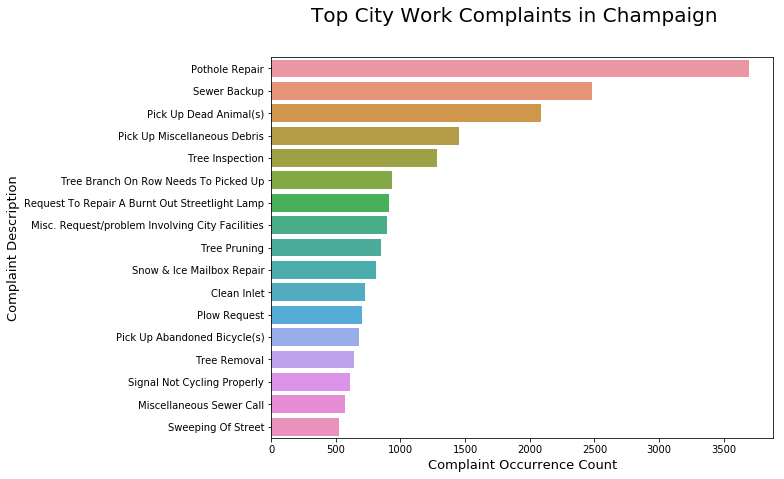

In [11]:
# Create a plot of the top city works complaints 
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.countplot(y="DESCRIPTION", data=description_over_500, 
                   order=description_over_500['DESCRIPTION'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Complaint Occurrence Count", size=13)
ax.set_ylabel("Complaint Description", size=13)
suptitle("Top City Work Complaints in Champaign", size=20)
fig = ax.get_figure()

#fig.savefig("topcityworksplot",bbox_inches="tight")

In [12]:
# Create a plot of the top city works complaints 
# Take only complaints where there are less than 6
description_under_6 = cityWorks.groupby('DESCRIPTION').filter(lambda x:len(x) < 6)

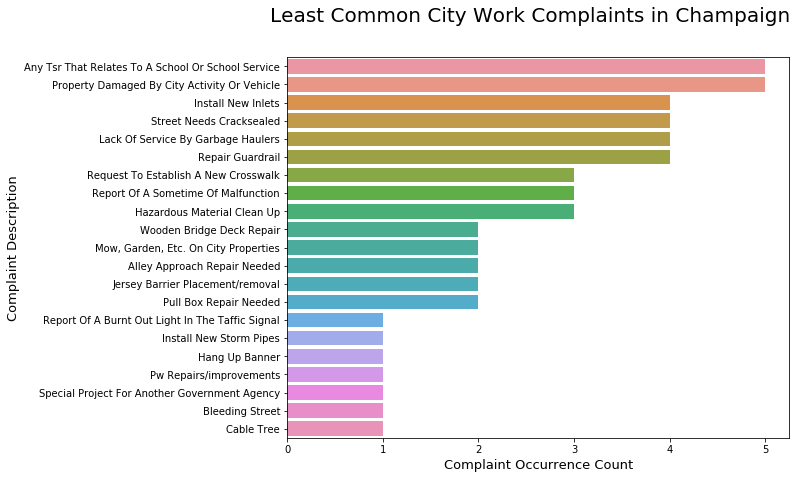

In [13]:
# graph the least common complaints
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.countplot(y="DESCRIPTION", data=description_under_6, 
                   order=description_under_6['DESCRIPTION'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Complaint Occurrence Count", size=13)
ax.set_ylabel("Complaint Description", size=13)
suptitle("Least Common City Work Complaints in Champaign", size=20)
fig = ax.get_figure()

#fig.savefig("topcityworksplot",bbox_inches="tight")

## Graph complaints by year
Use the section to create a new column that contains only year information, graph the number of complaints in that year. 

In [52]:
# Add a column with just year information, extracted from datetime
cityWorks['Year'] = cityWorks['DATETIMEINIT']

In [47]:
#check out new year column 
cityWorks.sample(2)

,Num of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,SRX,SRY,Year
17371,17495,Sewer Backup,2014,2014.0,Closed,1302 Myrtle Beach Ave,991827.94,1260839.43,2014
28267,28424,Sweeping Of Street,2017,2017.0,Closed,2411 Southwood Dr,997018.09,1248182.33,2017


In [48]:
# now group data by year to make countplot 
year_group = cityWorks.groupby("Year").count()

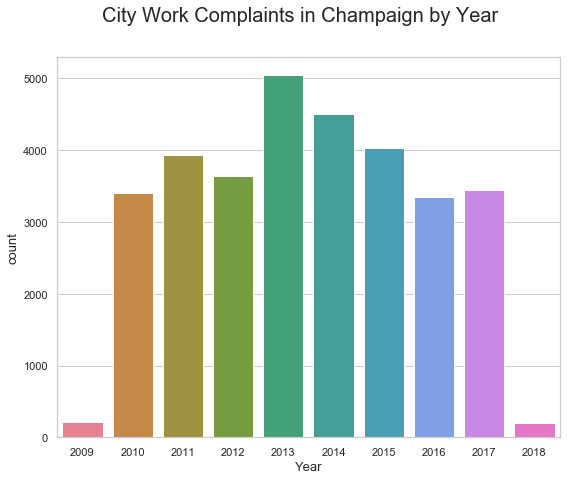

In [49]:
# create a plot for number of complaints by year 


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("City Work Complaints in Champaign by Year", size=20)
ax = sns.countplot(x="Year", data=cityWorks, palette='husl')

fig = ax.get_figure()

#fig.savefig("cityworkcomplaintsbyyear",bbox_inches="tight")


In [54]:
# Now I am going to try to find the most common complaint by year, starting with 2010
cityWorks_2010 = cityWorks[cityWorks['Year']== 2010]
cityWorks_2011 = cityWorks[cityWorks['Year']== 2011]
cityWorks_2012 = cityWorks[cityWorks['Year']== 2012]
cityWorks_2013 = cityWorks[cityWorks['Year']== 2013]
cityWorks_2014 = cityWorks[cityWorks['Year']== 2014]
cityWorks_2015 = cityWorks[cityWorks['Year']== 2015]
cityWorks_2016 = cityWorks[cityWorks['Year']== 2016]
cityWorks_2017 = cityWorks[cityWorks['Year']== 2017]
cityWorks_2018 = cityWorks[cityWorks['Year']== 2018]

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


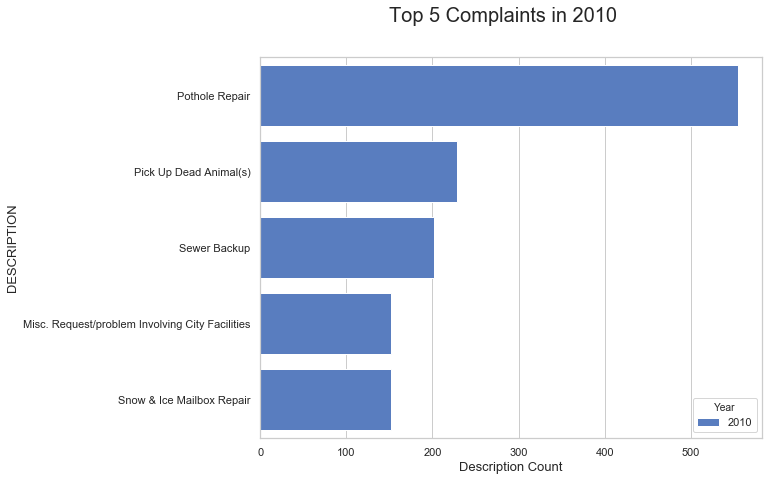

In [55]:
#group by description, add a count, and graph results for top 5 most common complaints per year
cityWorks_2010['Description Count'] = cityWorks_2010.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2010 = cityWorks_2010.sort_values('Description Count',  ascending=False)
sort5_2010 = sorted_2010.drop_duplicates(subset=['DESCRIPTION']).head(5)

f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2010", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2010, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


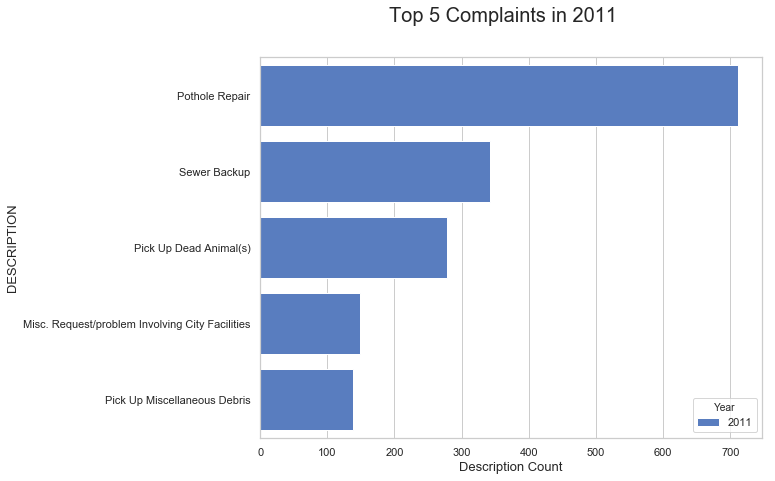

In [56]:
cityWorks_2011['Description Count'] = cityWorks_2011.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2011 = cityWorks_2011.sort_values('Description Count',  ascending=False)
sort5_2011 = sorted_2011.drop_duplicates(subset=['DESCRIPTION']).head(5)

f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2011", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2011, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


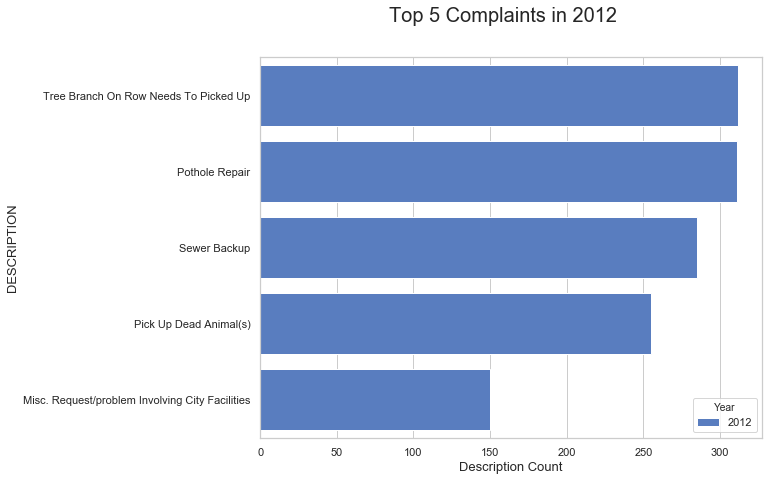

In [57]:
cityWorks_2012['Description Count'] = cityWorks_2012.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2012 = cityWorks_2012.sort_values('Description Count',  ascending=False)
sort5_2012 = sorted_2012.drop_duplicates(subset=['DESCRIPTION']).head(5)

f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2012", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2012, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


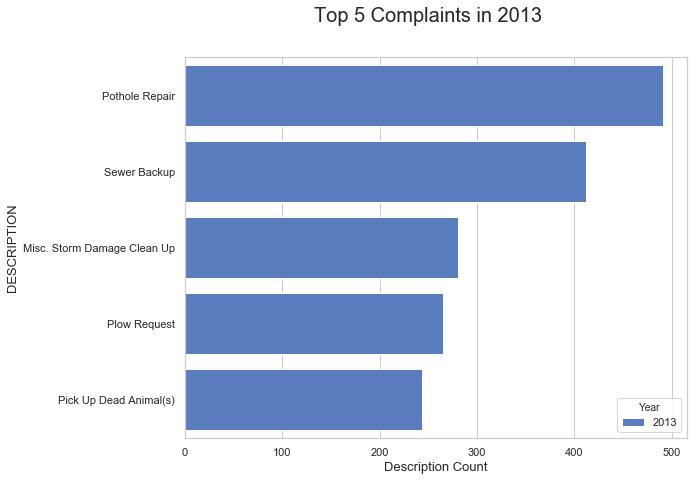

In [58]:
cityWorks_2013['Description Count'] = cityWorks_2013.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2013 = cityWorks_2013.sort_values('Description Count',  ascending=False)
sort5_2013 = sorted_2013.drop_duplicates(subset=['DESCRIPTION']).head(5)

f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2013", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2013, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


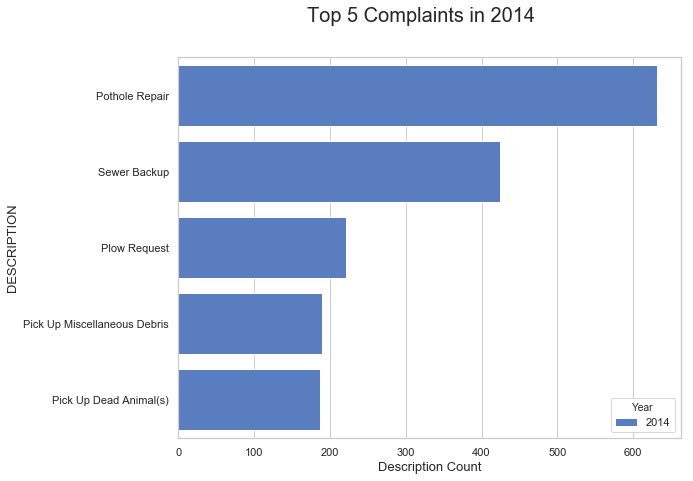

In [59]:
cityWorks_2014['Description Count'] = cityWorks_2014.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2014 = cityWorks_2014.sort_values('Description Count',  ascending=False)
sort5_2014 = sorted_2014.drop_duplicates(subset=['DESCRIPTION']).head(5)


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2014", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2014, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


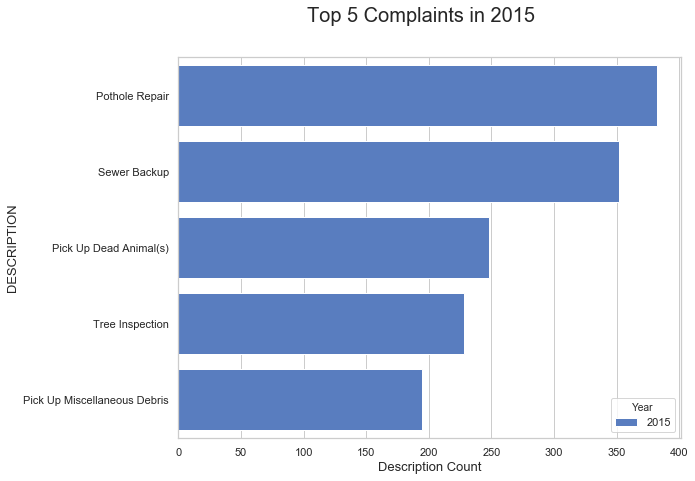

In [60]:
cityWorks_2015['Description Count'] = cityWorks_2015.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2015 = cityWorks_2015.sort_values('Description Count',  ascending=False)
sort5_2015 = sorted_2015.drop_duplicates(subset=['DESCRIPTION']).head(5)


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2015", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2015, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


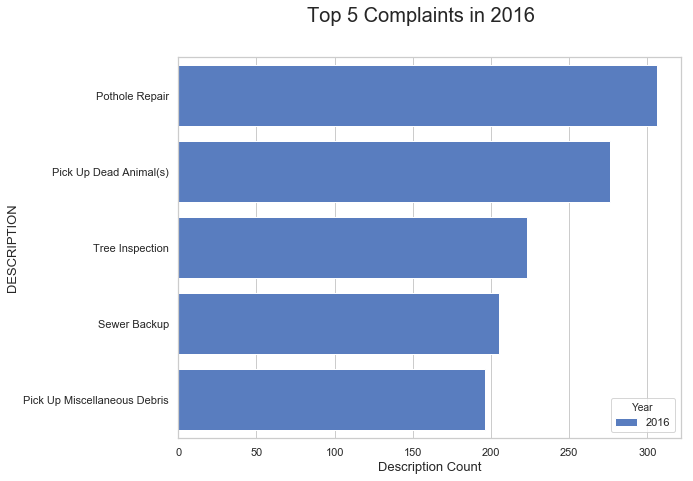

In [61]:
cityWorks_2016['Description Count'] = cityWorks_2016.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2016 = cityWorks_2016.sort_values('Description Count',  ascending=False)
sort5_2016 = sorted_2016.drop_duplicates(subset=['DESCRIPTION']).head(5)


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2016", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2016, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


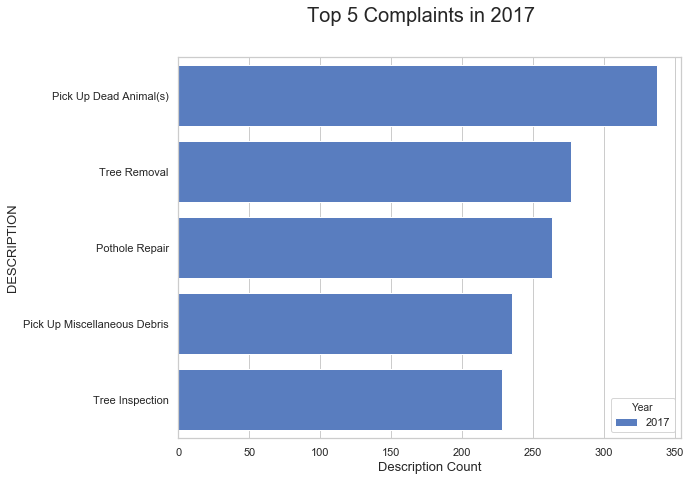

In [62]:
cityWorks_2017['Description Count'] = cityWorks_2017.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2017 = cityWorks_2017.sort_values('Description Count',  ascending=False)
sort5_2017 = sorted_2017.drop_duplicates(subset=['DESCRIPTION']).head(5)


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2017", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2017, palette='muted', hue='Year')

fig = ax.get_figure()

C:\Users\Kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


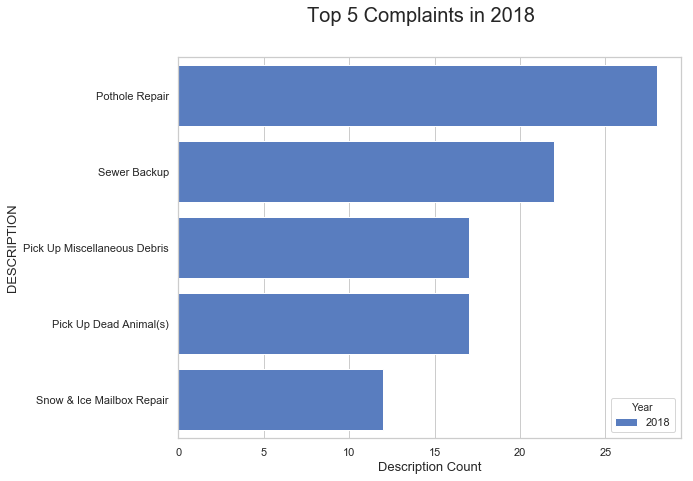

In [63]:
cityWorks_2018['Description Count'] = cityWorks_2018.groupby('DESCRIPTION')['DESCRIPTION'].transform('count')
sorted_2018 = cityWorks_2018.sort_values('Description Count',  ascending=False)
sort5_2018 = sorted_2018.drop_duplicates(subset=['DESCRIPTION']).head(5)


f, ax = plt.subplots(figsize=(9, 7))
sns.set(style="whitegrid")
ax.set_xlabel("Year", size=13)
ax.set_ylabel("Complaint Count", size=13)
suptitle("Top 5 Complaints in 2018", size=20)
ax = sns.barplot(x="Description Count",y='DESCRIPTION', data=sort5_2018, palette='muted', hue='Year')

fig = ax.get_figure()


## Graph most/least common complaint locations
First, we make a plot of the most common complaint locations, then one of the least common. 

In [32]:
# get most common complaint addresses 
locations = cityWorks.groupby('PROBADDRESS').filter(lambda x:len(x) > 150)

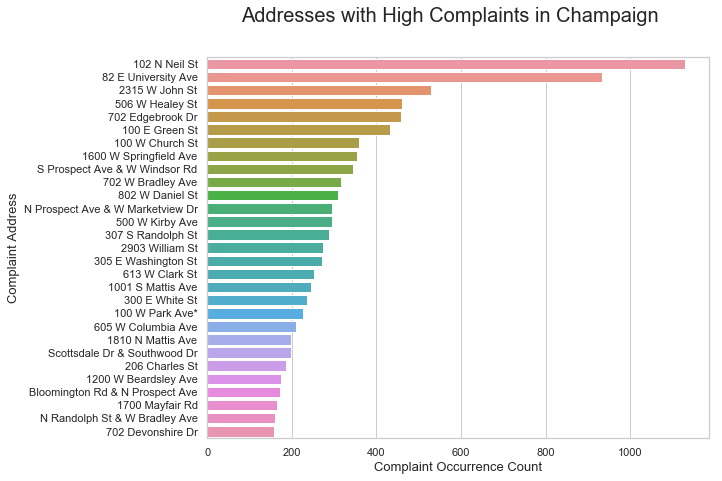

In [33]:
# graph the most common complaints addresses 
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.countplot(y="PROBADDRESS", data=locations, 
                   order=locations['PROBADDRESS'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Complaint Occurrence Count", size=13)
ax.set_ylabel("Complaint Address", size=13)
suptitle("Addresses with High Complaints in Champaign", size=20)
fig = ax.get_figure()

#fig.savefig("topcityworksplot",bbox_inches="tight")

In [34]:
# get least common complaint addresses 
locations_least = cityWorks.groupby('PROBADDRESS').filter(lambda x:len(x) < 20)

In [35]:
# After printing the least common datafame, we see there are too many instances for the graph, let's take just a sample
locations_least.sample(10)

,Num of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,SRX,SRY,Year
14305,14395,Sewer Backup,2013,2013.0,Closed,25 Leichner Dr,1009817.70,1261998.95,2013
17040,17151,Pothole Repair,2014,2014.0,Closed,2308-2436 County Road 1700 North,992451.23,1260443.11,2014
29676,29834,Miscellaneous Forestry Request,2017,2017.0,Closed,S Draper Ave & W University Ave,1001883.80,1256308.30,2017
21334,21471,Plow Request,2015,2015.0,Closed,5112 Emmas Way,984758.00,1247161.52,2015
6386,6420,Miscellaneous Sewer Call,2011,2011.0,Closed,3905 Glenn Brooke Rd,991196.00,1251230.00,2011
11646,11718,General S&i Inquiry Or Complaint,2013,2013.0,Closed,3907 Brookfield Dr,990964.39,1261600.02,2013
26097,26237,Tree Inspection,2016,2016.0,Closed,1905 Rugby Rd,997080.75,1247532.52,2016
25864,26004,Pothole Repair,2016,2016.0,Closed,101-151 S 6th St,1012177.12,1253237.92,2016
17281,17397,Pothole Repair,2014,2014.0,Closed,Convenience Center Rd & N Neil St,1009255.60,1264600.30,2014
10391,10453,"Barricade Setup Spec. Event - Fire, Accident, ...",2012,2012.0,Closed,W Park Ave & N New St,1006356.50,1256639.70,2012


In [36]:
locations_least_new = locations_least.sample(10)

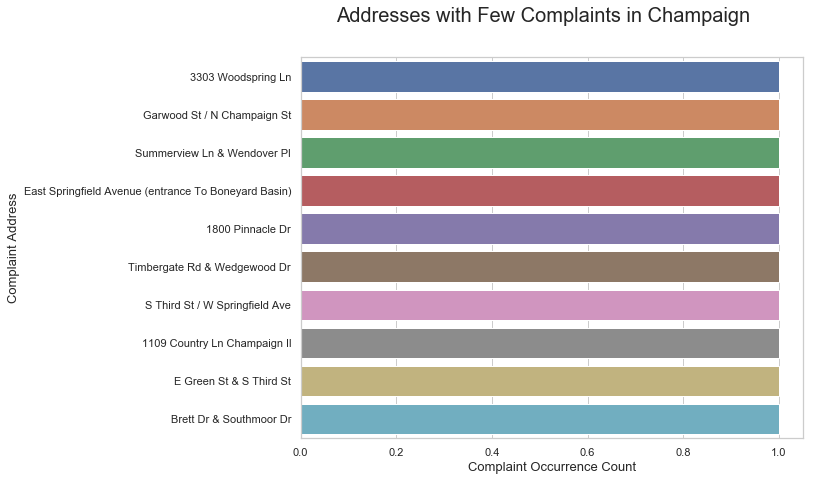

In [37]:
# graph the least common complaints addresses 
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.countplot(y="PROBADDRESS", data=locations_least_new, 
                   order=locations_least_new['PROBADDRESS'].value_counts().index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Complaint Occurrence Count", size=13)
ax.set_ylabel("Complaint Address", size=13)
suptitle("Addresses with Few Complaints in Champaign", size=20)
fig = ax.get_figure()

#fig.savefig("topcityworksplot",bbox_inches="tight")

## Graph geo data 
Here, I upload a cleaned dataframe (I cleaned it using OpenRefine) that would allow me to work with the geographic data. Still figuring out how to work with this component. 

In [29]:
# Now some mapping
# first, import the CSV that has the coordinates as int, no commas
cityWorks_int = pd.read_csv("Cleaned_cityworks.csv")
cityWorks_int.sample(2)

,# of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,Longitude,Latitude
25260,25399,Pick up miscellaneous debris,Thu Mar 10 13:39:02 CST 2016,Mon Mar 14 15:33:42 CDT 2016,CLOSED,2-28 Taylor St,1009564.03,1256654.62
23888,24026,Sewer backup,Mon Sep 21 13:55:57 CDT 2015,Tue Sep 22 08:11:14 CDT 2015,CLOSED,1211 Hollycrest Dr,999138.86,1251478.68


In [30]:
# now that we input the numberical csv, let's map using reduced coordinates
cityWorks_int["Long"] = cityWorks_int.iloc[:,6]/100000
cityWorks_int["Lat"] = cityWorks_int.iloc[:,7]/100000

cityWorks_int.sample(2)

,# of SR,DESCRIPTION,DATETIMEINIT,DATETIMECLOSED,STATUS,PROBADDRESS,Longitude,Latitude,Long,Lat
24027,24165,Request to repair a burnt out streetlight lamp,Mon Oct 05 08:32:26 CDT 2015,Fri Oct 09 13:09:05 CDT 2015,CLOSED,S James St & W Armory Ave,1003402.0,1252335.4,10.034020,12.523354
19032,19166,Sewer backup,Sat Jul 12 12:32:42 CDT 2014,Fri Aug 08 15:01:06 CDT 2014,CLOSED,408 Stanage Ave,1007732.1,1252220.7,10.077321,12.522207


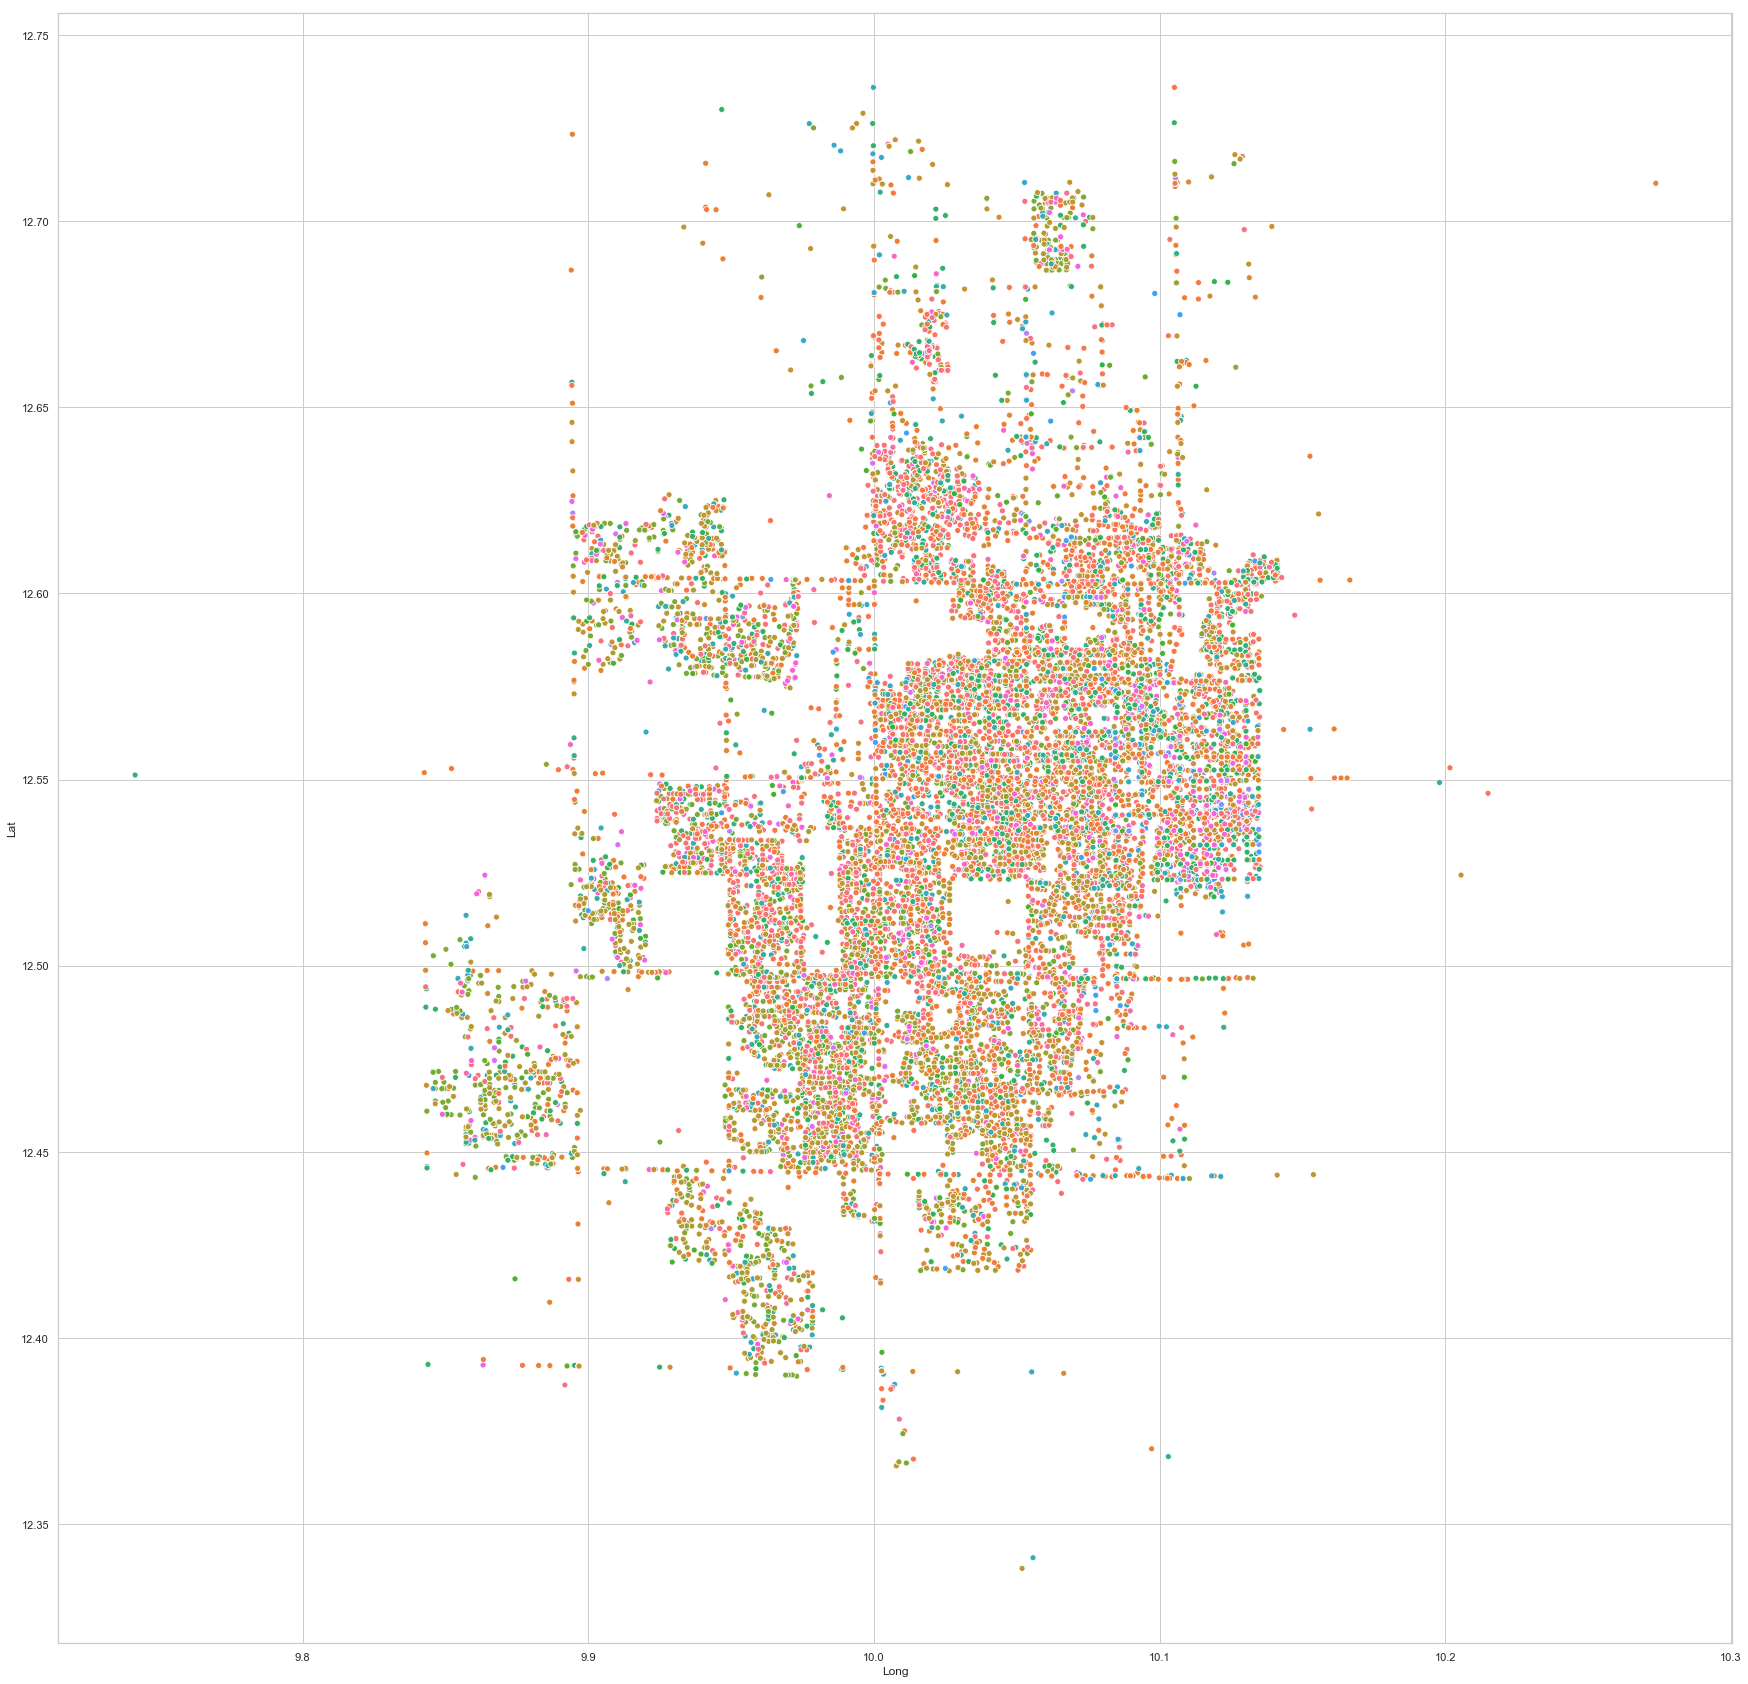

In [31]:
# This is way too big, I'm going to reduce it to only the top occuring complaints 
f, ax = plt.subplots(figsize=(30,30))
ax = sns.scatterplot(x='Long', y='Lat', hue='DESCRIPTION', data=cityWorks_int, legend=False)

fig = ax.get_figure()

#fig.savefig("mappedoutcitywork",bbox_inches="tight")

In [32]:
# Define a new row for top occuring issues
def top_issues (row):
    if row['DESCRIPTION'] == 'Pothole repair' :
        return 1
    if row['DESCRIPTION'] == 'Sewer backup' :
        return 1
    if row['DESCRIPTION'] == 'Pick up dead animal(s)' :
        return 1
    if row['DESCRIPTION'] == 'Pick up miscellaneous debris' :
        return 1
    if row['DESCRIPTION'] == 'Tree inspection' :
        return 1
    if row['DESCRIPTION'] == 'Tree branch on ROW needs to picked up' :
        return 1
    if row['DESCRIPTION'] == 'Request to repair a burnt out streetlight lamp' :
        return 1
    if row['DESCRIPTION'] == 'Misc. request/problem involving City facilities' :
        return 1
    if row['DESCRIPTION'] == 'Tree pruning' :
        return 1
    if row['DESCRIPTION'] == 'Snow & Ice mailbox repair' :
        return 1
    if row['DESCRIPTION'] == 'Clean inlet' :
        return 1
    if row['DESCRIPTION'] == 'Tree removal' :
        return 1
    if row['DESCRIPTION'] == 'Signal not cycling properly' :
        return 1
    if row['DESCRIPTION'] == 'Plow request' :
        return 1     
    else: 
        return np.nan

In [33]:
# create new column with the above data, create new dataframe and remove all nan
cityWorks_int['top_issues'] = cityWorks_int.apply(lambda row: top_issues(row),axis=1)

In [34]:
# drop all instances where there is an nan
cityWorks_intMap = cityWorks_int.dropna()

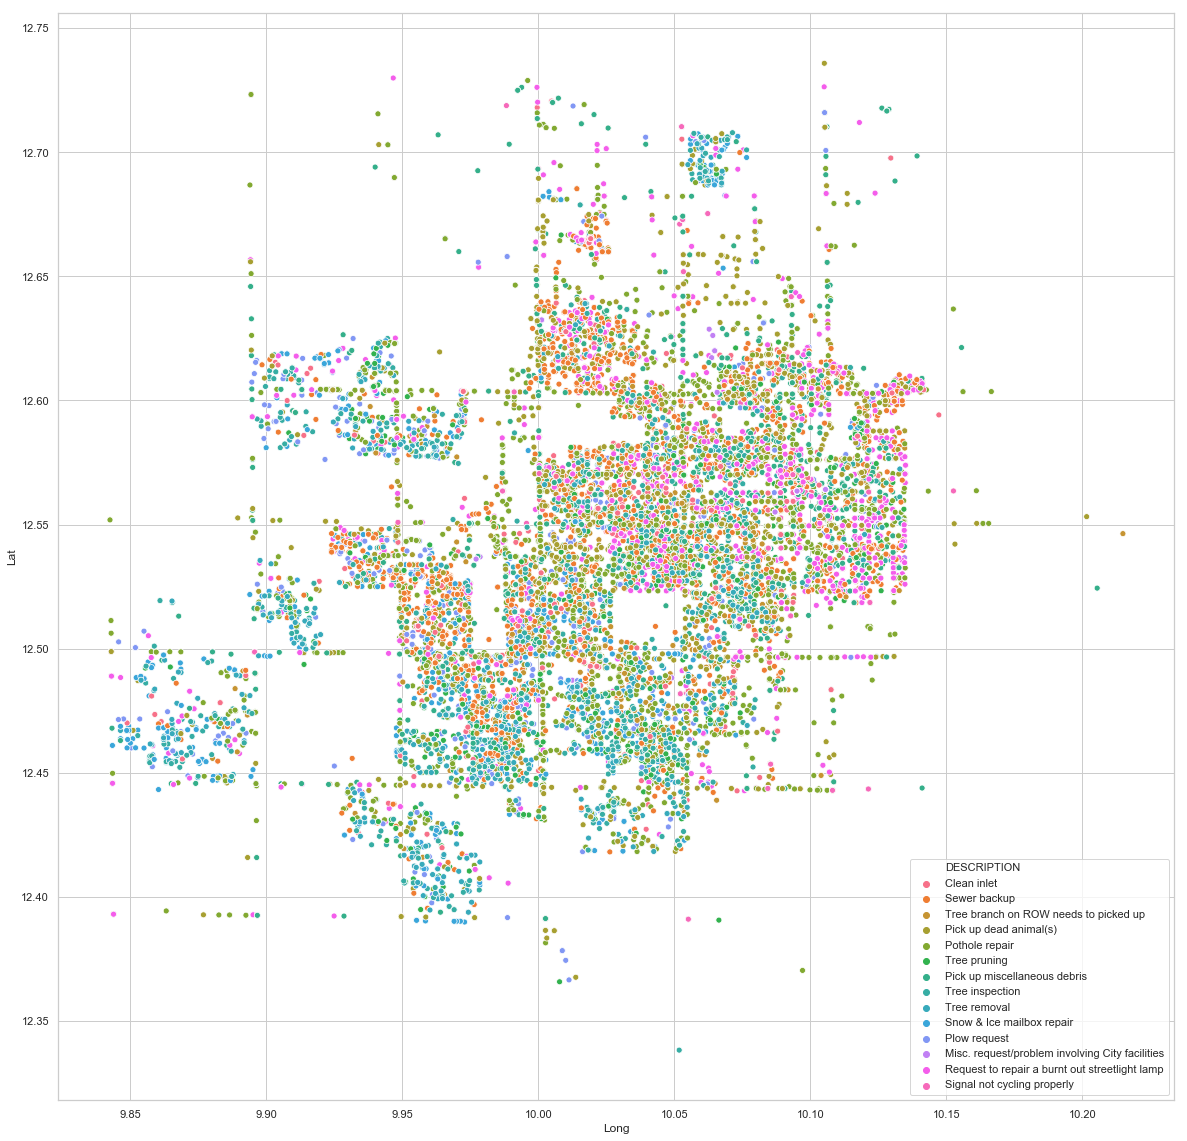

In [35]:
# now that's better, took only the top occuring instances to map
f, ax = plt.subplots(figsize=(20,20))
ax = sns.scatterplot(x='Long', y='Lat', hue='DESCRIPTION', data=cityWorks_intMap, legend='full')

fig = ax.get_figure()

fig.savefig("mappedoutcitywork",bbox_inches="tight")